# (Eng) .Import Libraries

# (Esp) .Importación de Librerías

In [2]:
!pip install requests 

import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import certifi

print(certifi.where())

SSL_CERT_FILE = '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/certifi/cacert.pem'

import certifi
import requests

try:
    print('Checking connection to Github...')
    test = requests.get('https://api.github.com')
    print('Connection to Github OK.')
except requests.exceptions.SSLError as err:
    print('SSL Error. Adding custom certs to Certifi store...')
    cafile = certifi.where()
    with open('certicate.pem', 'rb') as infile:
        customca = infile.read()
    with open(cafile, 'ab') as outfile:
        outfile.write(customca)
    print('That might have worked.')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/certifi/cacert.pem
Checking connection to Github...
Connection to Github OK.


# (Eng) .Super Market Sales Analysis 

# (Esp) .Análisis de Ventas de Supermercado

(Eng) .Charging de DataSet. Let´s see its features. 

(Esp) .Cargamos el DataSet en el NoteBook. Veamos sus características. 

In [9]:
sales = pd.read_csv('supermarket.csv')
sales.info

<bound method DataFrame.info of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle 

In [10]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [11]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


(Eng) .By inspection, the 'Date' datatype is an object, we need to change it to datetime.

(Esp) .A raiz de una inspección premiliminar, hemos observado que la columna "Date" tiene el datatype de object y necesitamos cambiarlo a datatime.

In [12]:
sales['date'] = pd.to_datetime(sales['Date'])

In [13]:
sales['date'].dtype

dtype('<M8[ns]')

In [14]:
type(sales['date'])

pandas.core.series.Series

In [15]:
sales['date'] = pd.to_datetime(sales['date'])

In [16]:
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [17]:
sales['Time'] = pd.to_datetime(sales['Time'])

In [19]:
sales['Hour'] = (sales['Time']).dt.hour    #type(sales['Time'])

In [21]:
sales['Hour'].nunique() #gives us the number of unique hours 


11

In [23]:
sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [24]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


In [25]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

(Eng) .Let´s see how much values there are in any column.

(Esp) .Veamos cuantos valores tiene cada columna.

In [26]:
print("# unique values in Branch: {0}".format(len(sales['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(sales['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(sales['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(sales['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(sales['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(sales['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


(Eng) .Gender_Count visualization.

(Esp) .Visualización del conteo de Géneros.

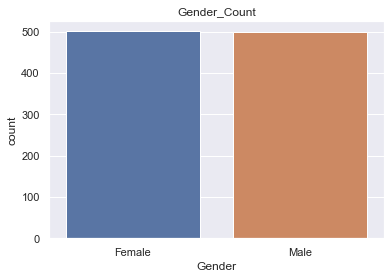

In [27]:
sns.set(style="darkgrid")       #style the plot background to become a grid
genderCount  = sns.countplot(x="Gender", data =sales).set_title("Gender_Count")

(Eng) .Ratings by branch.

(Esp) .Valoraciones por marca. 

Text(0.5, 1.0, 'Ratings by Branch')

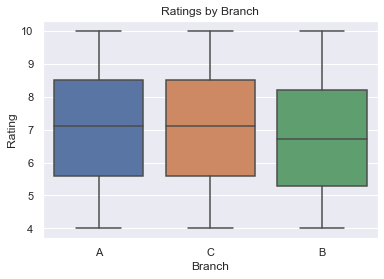

In [28]:
sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch") 

(Eng) .Product Sales per Hour.

(Esp) .Ventas de productos por Hora. 

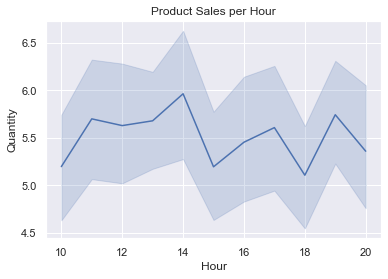

In [29]:
genderCount  = sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Product Sales per Hour")

(Eng) .Product Sales per Hour in each branch during 3 consecutive months. 

(Esp) .Ventas de productos por hora en cada marca a lo largo de 3 meses consecutivos. 

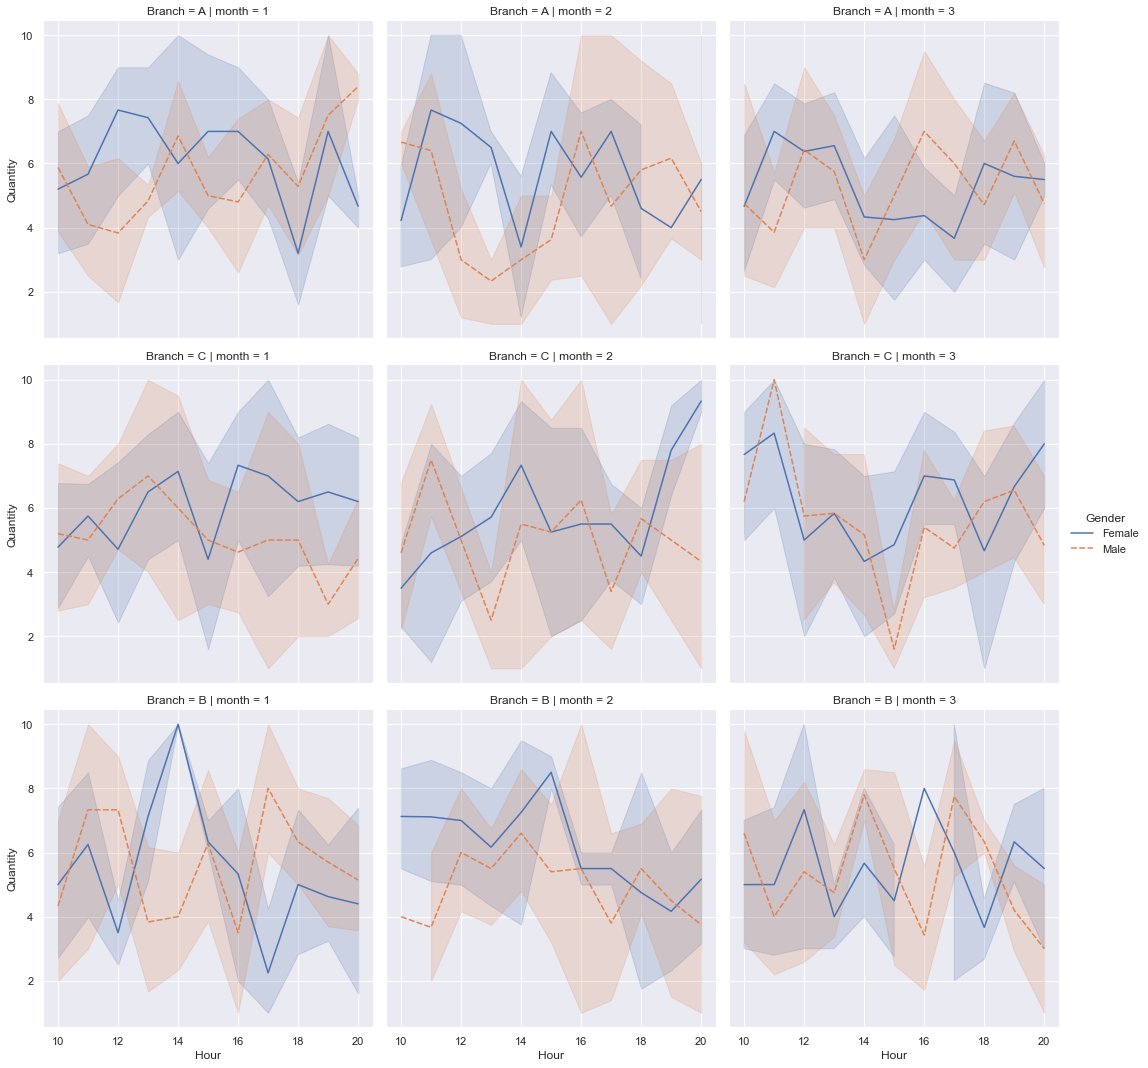

In [30]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =sales)

(Eng) .Total Sales in each branch during three consecutive months. 

(Esp) .Ventas totales en cada rama durante 3 meses consecutivas. 

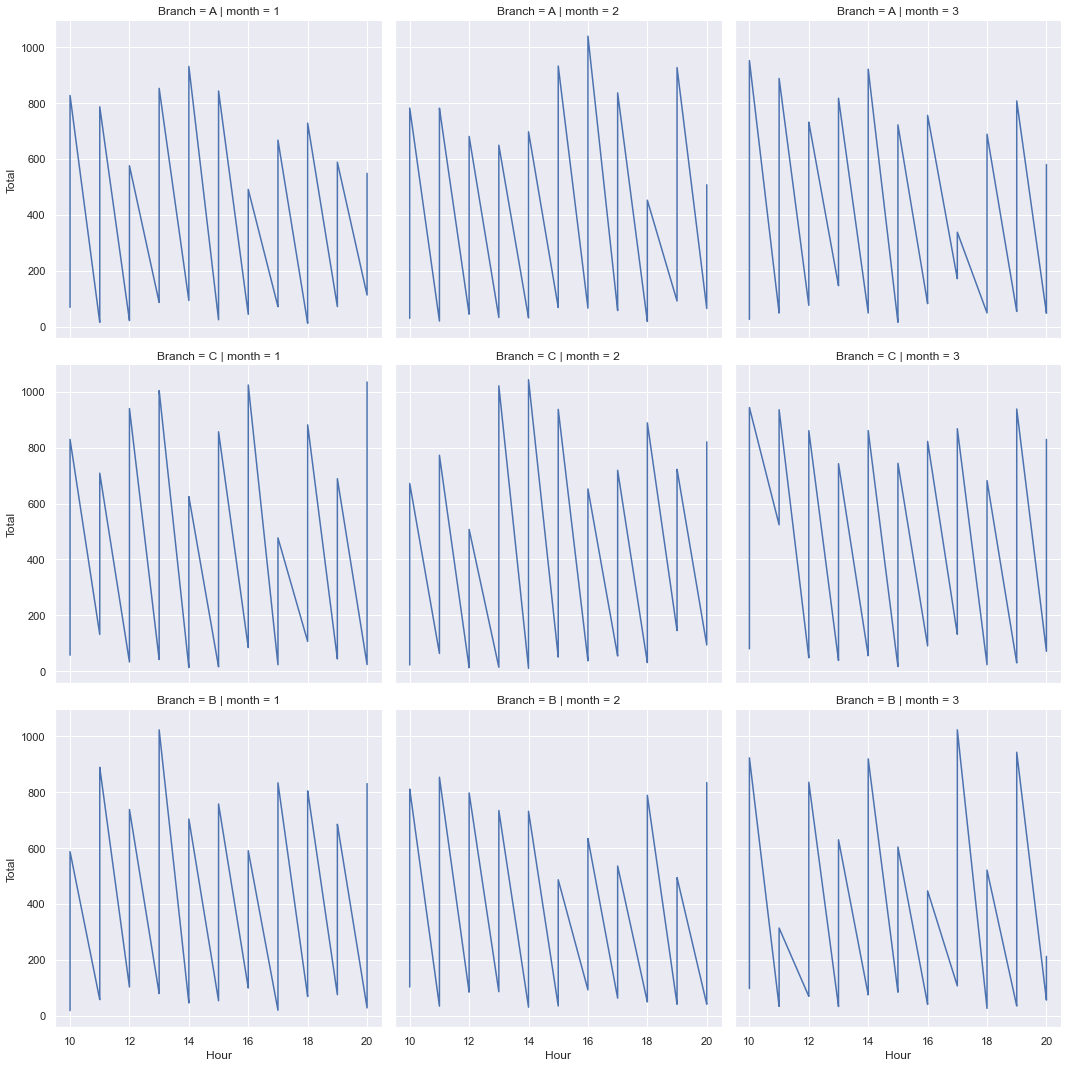

In [31]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)

In [32]:
sales['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

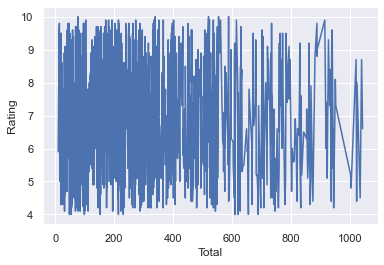

In [33]:
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =sales)

# (Eng) .Product Analysis
# (Esp) .Análisis de producto

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

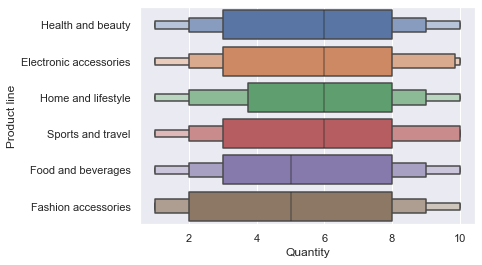

In [34]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )

(Eng). From the above visual, Health and Beauty,Electronic accessories, Homem and lifestyle, Sports and travel have a better average quantity sales that food and beverages as well as Fashion accessories.

(Esp). Desde una perspectiva global, Salud y belleza, Accesorios Electrónicos, Hogar y Estilo de vida, Deportes y Viajes tienen una mejor promedio de ventas que Alimentación y Accesorios de Moda. 

<AxesSubplot:xlabel='count', ylabel='Product line'>

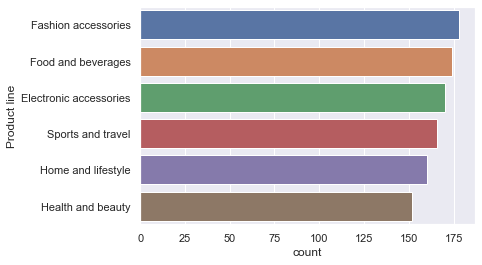

In [35]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )

(Eng) .From the above image shows the top product line item type sold in the given dataset. Fashion Accessories is the highest while Health and beauty is the lowest.

(Esp) .La imagen muestra la linea de tipo de productos más vendida del dataset. Accesorios de moda es el más alto mientas que Salud Y Belleza la que menos. 

<AxesSubplot:xlabel='Total', ylabel='Product line'>

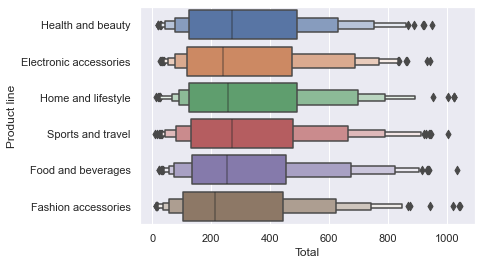

In [36]:
sns.boxenplot(y = 'Product line', x = 'Total', data=sales )

<AxesSubplot:xlabel='Total', ylabel='Product line'>

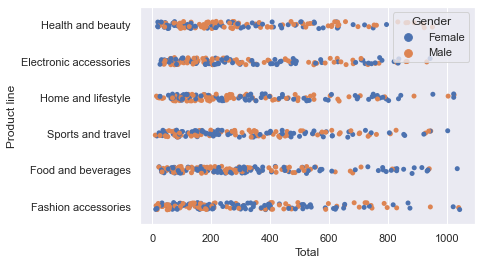

In [37]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales )

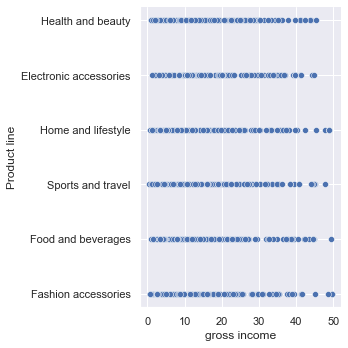

In [38]:
sns.relplot(y = 'Product line', x = 'gross income', data=sales )

<AxesSubplot:xlabel='Rating', ylabel='Product line'>

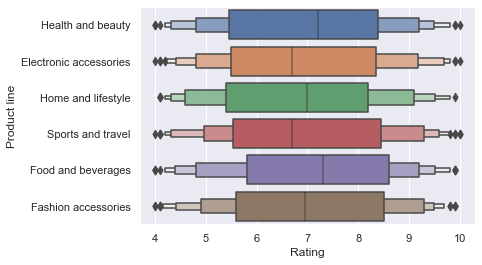

In [39]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=sales )

(Eng) .Food and Beverages have the highest average rating while sports and travel the lowest. Let's see when customers buy certain products in the various branches.

(Esp) .Alimentación tiene la media de mejores valoraciones, mientras que Deportes y Viajes tiene la más baja. Veamos una diapositiva que muestra a los clientes comprando ciertos productos de varias marcas. 

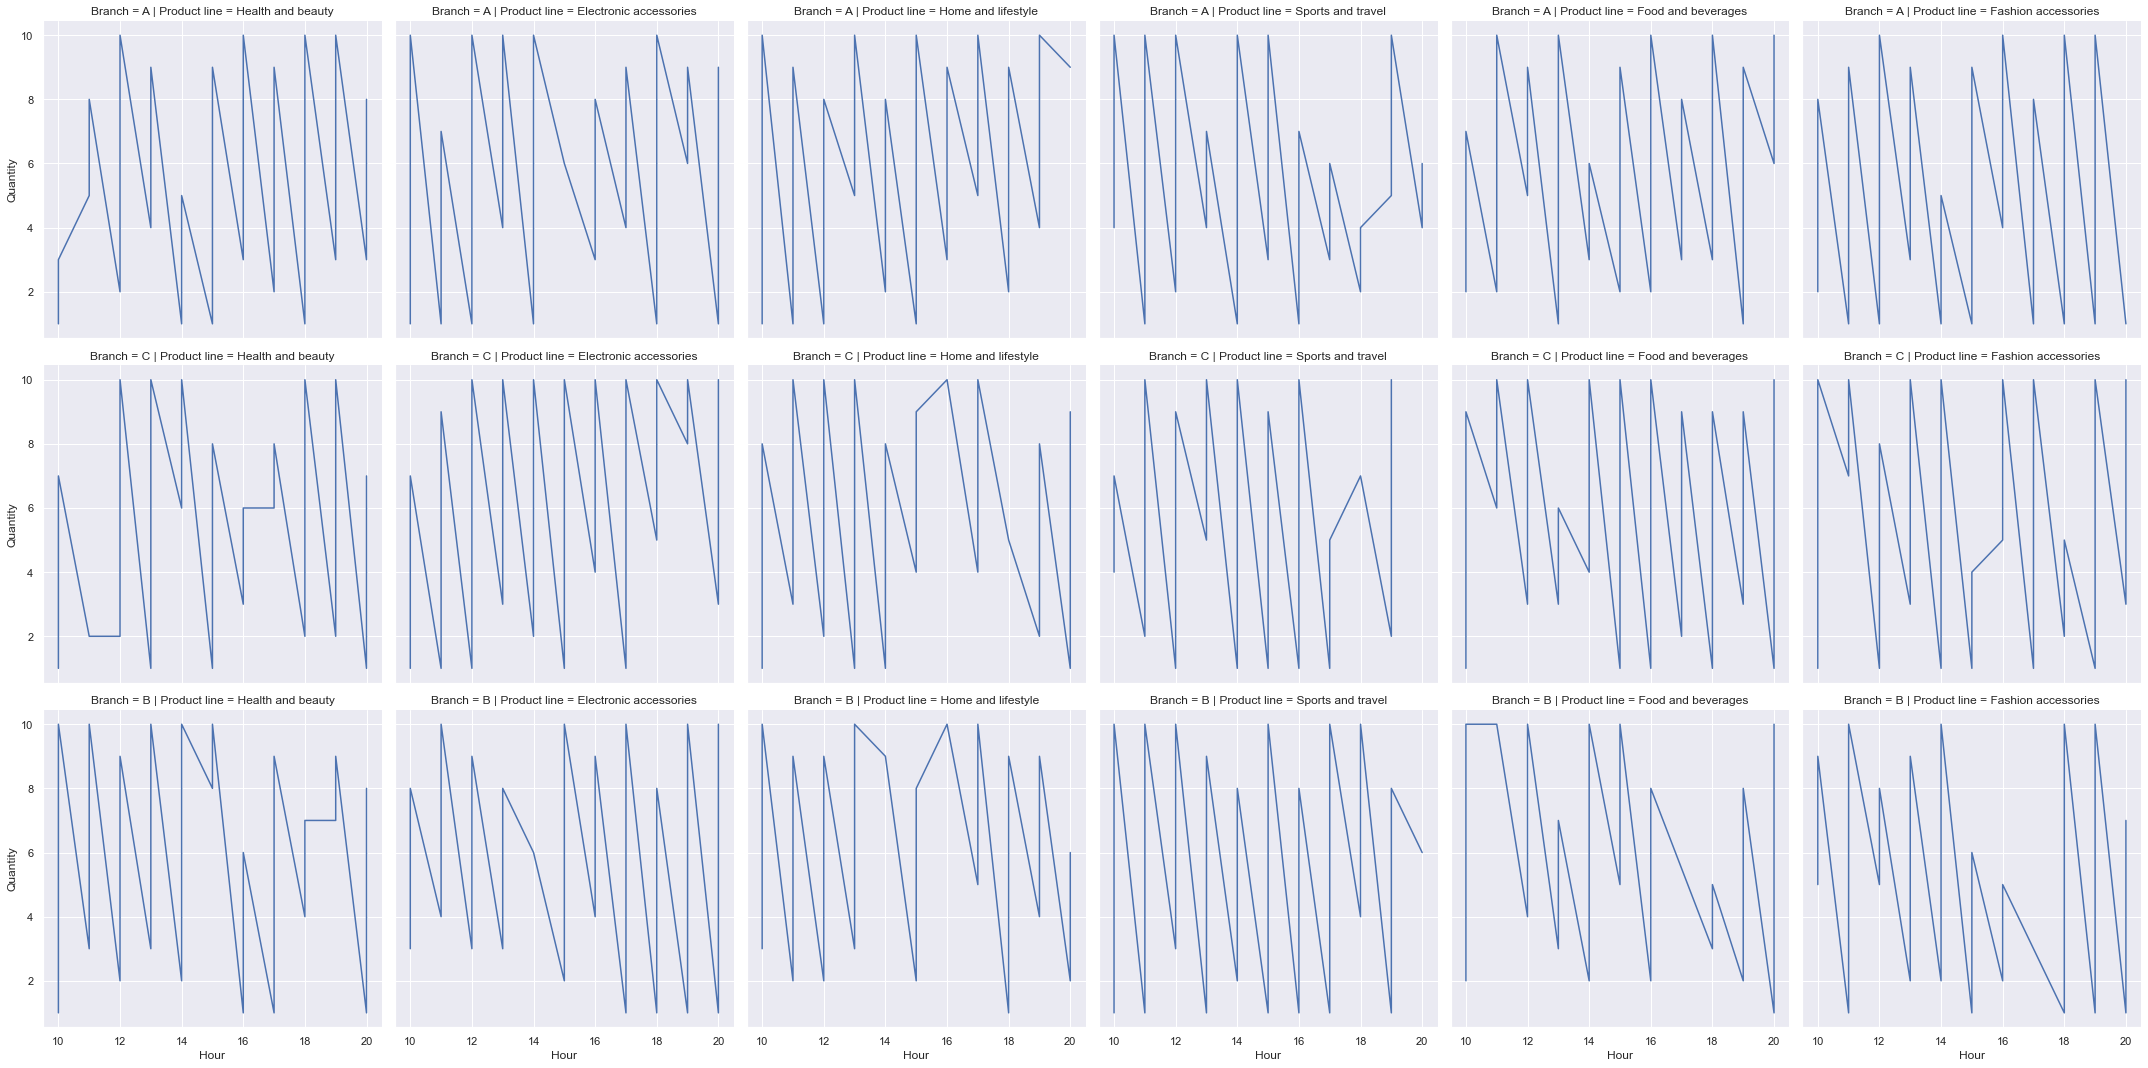

In [40]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =sales)

(Eng) .From the above plots, we can see that food and beverages sales usually high in all three branches at evening especially around 19:00.

(Esp) .En el anterior diagrama de cajas, podemos ver que las ventas de Alimentación son normalmentes más altas por la noche en las 3 ramas, sobretodo en torno a las 19:00. 

# (Eng) .Payment Channel.

# (Esp) .Método de Pago.

(Eng) .Let see how customers make payment in this business. 

(Esp) .Veamos que método de pago usan los clientes en el negocio. 

Text(0.5, 1.0, 'Payment Channel')

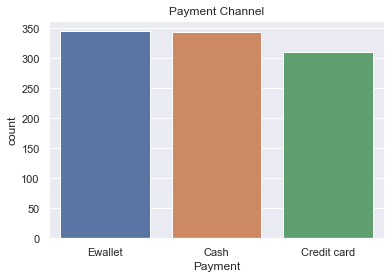

In [41]:
 sns.countplot(x="Payment", data =sales).set_title("Payment Channel") 

(Eng) .Most of the customers pay through the Ewallet and Cash Payment while under 40 percent of them pay with their credit card. We would also like to see this payment type distribution across all the branches.

(Esp) .La mayoría de clientes prefieren el pago a través de Ewallet, seguido del pago en efectivo mientras que menos del 40% de los clientes pagan con tarjeta de crédito. Podríamos mirar también la distribución del tipo de pago a través de todas las ramas. 

Text(0.5, 1.0, 'Payment Channel by Branch')

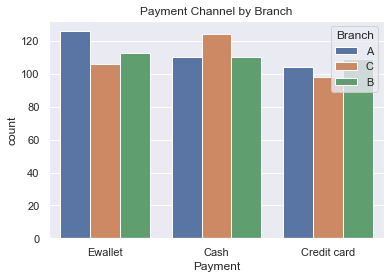

In [42]:
 sns.countplot(x="Payment", hue = "Branch", data =sales).set_title("Payment Channel by Branch") 

# (Eng) .Customer Analysis

# (Esp) .Análisis del Cliente

(Eng) .From inspection, there are two types of customers. Members and Normal. Let's see how many they are and where they are. 

(Esp) .A raiz de una inspeción, podemos ver que hay dos tipos de clientes. Miembros y Normales. Veamos cuantos hay de cada tipo y donde están. 

In [43]:
sales['Customer type'].nunique()

2

Text(0.5, 1.0, 'Customer Type')

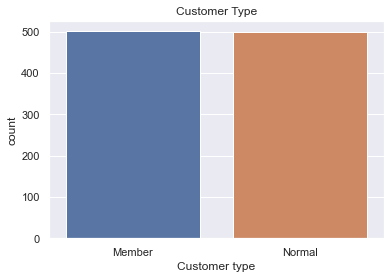

In [44]:
 sns.countplot(x="Customer type", data =sales).set_title("Customer Type") 

Text(0.5, 1.0, 'Customer Type by Branch')

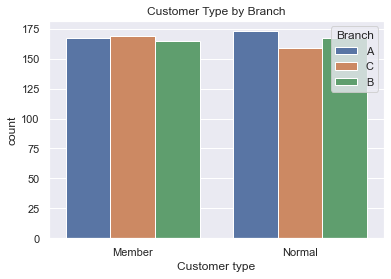

In [45]:
 sns.countplot(x="Customer type", hue = "Branch", data =sales).set_title("Customer Type by Branch") 

(Eng) .Does customer type influences the sales? Let´s see it. 

(Esp) .¿Tiene alguna influencia el tipo de cliente en las ventas? Comprobemoslo.

In [46]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<AxesSubplot:xlabel='Customer type', ylabel='Total'>

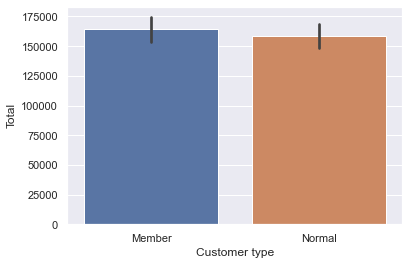

In [47]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=sales)

(Eng) .Does the customer type influence customer rating? Let's find out.

(Esp) .¿Se verá el Ranking de valoración afectado por el tipo de cliente? Veámoslo. 

Text(0.5, 1.0, 'Customer Type')

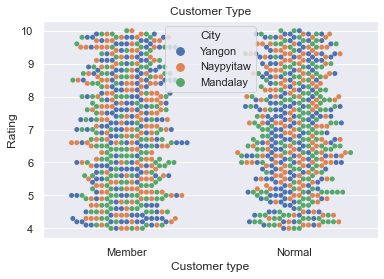

In [49]:
sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =sales).set_title("Customer Type") 



(Eng) .With the use of google search, I was able to get the longitude and latitude of each cities. 

(Esp) .Con el uso de Google search, he podido obtener la longitud y latitud de cada ciudad.

In [50]:
long = {"Yangon": 16.8661, "Naypyitaw": 19.7633, "Mandalay": 21.9588 }
lat = {"Yangon": 96.1951, "Naypyitaw": 96.0785, "Mandalay": 96.0891 }
for set in sales:
    sales['long'] = sales['City'].map(long)
    sales['lat'] = sales['City'].map(lat)

Text(0.5, 1.0, 'Customer Type')

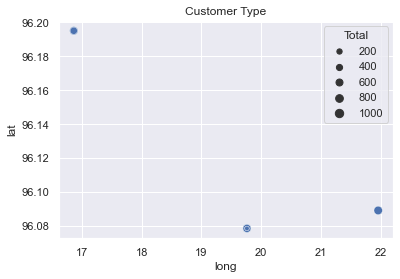

In [51]:
 sns.scatterplot(x="long",  y = "lat",size = "Total", data =sales, legend = "brief").set_title("Customer Type") 

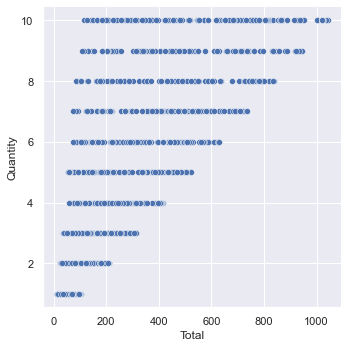

In [52]:
 sns.relplot(x="Total",  y = "Quantity", data =sales)